In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import *


In the following cell, we'll try a simple numerical simulation of a one-dimensional system defined only by the force equation $F(x) = -kx$ and initial conditions $x(0) = 0$ and $v(0) = 1$. 

Analytically, we can show that this system follows $x(t) = A \cos(\omega t) + B \sin \omega t$ (Exercise 3.4). We'll compare the numerical simulation with this solution.

We'll try with some arbitrary parameter values first, just to see the shape of the curves.

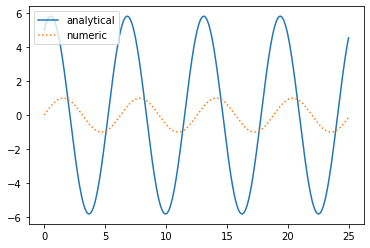

In [2]:
k, m = 1, 1 
A, B, omega = 5, 3, 1
tmax, tstep = 25, 0.001

t = np.arange(0, tmax, tstep)
x = A * np.cos(omega * t) + B * np.sin(omega * t)

plt.plot(t, x, label='analytical')

xnums = []
xnum = 0
velocity = 1
for time in t:
    force = - k * xnum
    velocity += force * tstep
    xnum += velocity * tstep
    
    xnums.append(xnum)
    
plt.plot(t, xnums, ':', label='numeric')
plt.legend()
    

The shape is the same, but we need to work out the proper values for $A$, $B$ and $omega$ for the two curves to properly coincide.

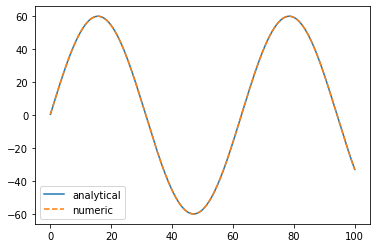

In [3]:
# numerical parameters
k = 0.01
x0, v0 = 0.5, 6

# analytical parameters
omega = sqrt(k)
A, B = x0, v0/omega

tmax, tstep = 100, 0.01 

t = np.arange(0, tmax, tstep)
x = A * np.cos(omega * t) + B * np.sin(omega * t)


plt.plot(t, x, label='analytical')

xnums = []
xnum = x0
velocity = v0
for time in t:
    force = - k * xnum
    velocity += force * tstep
    xnum += velocity * tstep
    
    xnums.append(xnum)
    
plt.plot(t, xnums, '--', label='numeric')
plt.legend()
    

Let's try this in three dimensions. For the numerical approach, we just need to replace the scalar $k$ by a vector:
 $$F(t)_i = - k_i x_i$$
 
For the analytical formulation, we can take the same approach we took in the one dimensional case, and apply it independently for each dimenion. Since we only applied differentiation, we can just take partial derivatives and end up with three formulae
$$x_i(t) = A_i \cos(\omega_i t) + B_i \sin (\omega_i t)  $$


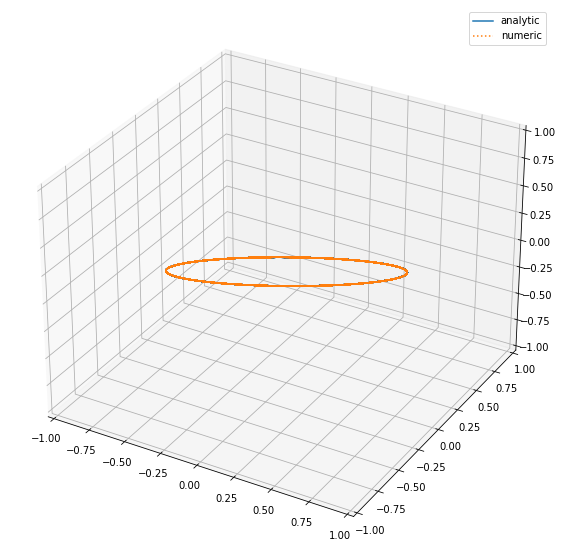

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# numerical parameters
k = np.asarray([0.1, 0.1, 0.1])
x0, v0 = np.asarray([0.1, 0.1, 0.1], dtype=np.float), np.asarray([0.2, 0.1, 0], dtype=np.float)

# analytical parameters
omega = np.sqrt(k)
A, B = x0, v0 / omega

tmax, tstep = 1000, 0.01 

t = np.arange(0, tmax, tstep)[:, None]
x = A * np.cos(omega * t) + B * np.sin(omega * t)

ax.plot(xs=x[:, 0], ys=x[:, 1], zs=x[:, 2], label='analytic')

xnums = np.zeros((t.shape[0], 3))
xnum = x0
velocity = v0

for i, time in enumerate(t):
    force = - k * xnum
    velocity += force * tstep
    xnum += velocity * tstep
    
    xnums[i, :] = xnum

ax.plot(xs=xnums[:, 0], ys=xnums[:, 1], zs=xnums[:, 2], linestyle=':', label='numeric')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.legend()

Some things to note:

* If we give k different values in difference dimensions, we get a Lissajous curve that isn't a simple ellipse. This is known as complex harmonic motion.
* If we make $v_0$ uniform, we get a 1D harmonic oscillator along the xyz diagonal (which shows as a line). If we make one element negative, we get the same thing along an antidiagonal. If we make $k_x$ zero, we get a 1D HO along the $yz$ diagonal.
* $x_0$ does not just determine a translation of the function. To get an ellipse (that isn't a line segment), we need to set some of the values of $x_0$ to nonzero.
    

(-1.0, 1.0)

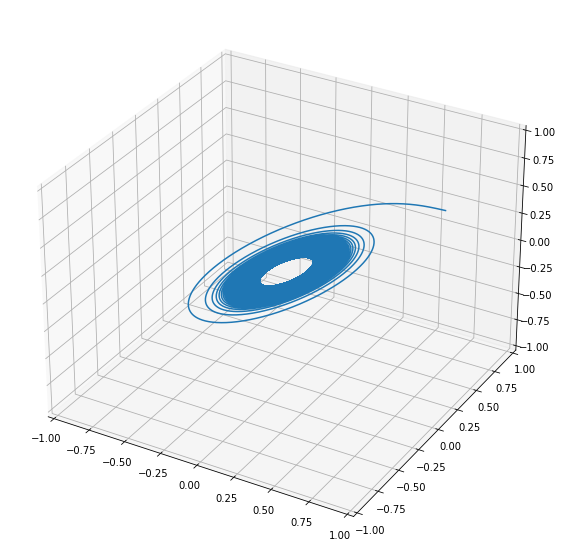

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# numerical parameters
k = np.asarray([1, 1.0, 1.0])
k_ambient = np.asarray([0.0, 0.0, 0.5])
x0, v0 = np.asarray([0.1, 0.1, 0.1], dtype=np.float), np.asarray([0.1, 0.0, 0.], dtype=np.float)

tmax, tstep = 10000, 0.01 

t = np.arange(0, tmax, tstep)[:, None]

xnums = np.zeros((t.shape[0], 3))
xnum = x0
velocity = v0
b = 1.00001

for i, time in enumerate(t):
    force = - k * (1 - i/t.shape[0]) * xnum
    velocity += force * tstep
    xnum += velocity * tstep
    
    xnums[i, :] = xnum

ax.plot(xs=xnums[:, 0], ys=xnums[:, 1], zs=xnums[:, 2])
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
